In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("notebook/data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values present in the data

### Checking for duplicated values

In [4]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicated value present in the data

### Checking for uniqueness of data in each columns

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Checking data types and stats

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:
* The mean score of the student in subject lies between 66.08900 and 68.05400
* Also the std deviation are close therefore there is not significant difference seen

In [13]:
print("Categorical features in 'gender' variable: ",end=" ")
print(df["gender"].unique())
print("Categorical features in 'race/ethnicity' variable: ",end=" ")
print(df["race/ethnicity"].unique())
print("Categorical features in 'parental level of education' variable: ",end=" ")
print(df["parental level of education"].unique())
print("Categorical features in 'lunch': ",end=" ")
print(df["lunch"].unique())
print("Categorical features in 'test preparation course' variable: ",end=" ")
print(df["test preparation course"].unique())

Categorical features in 'gender' variable:  ['female' 'male']
Categorical features in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categorical features in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorical features in 'lunch':  ['standard' 'free/reduced']
Categorical features in 'test preparation course' variable:  ['none' 'completed']


In [15]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('\n we have {} categorical features: {} '.format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']

 we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] 


In [16]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
full_in_maths = df[df['math score']==100]['average'].count()
full_in_reading = df[df['reading score']==100]['average'].count()
full_in_writing = df[df['writing score']==100]['average'].count()

print(f'Number of students with full marks in Maths: {full_in_maths}')
print(f'Number of students with full marks in reading: {full_in_reading}')
print(f'Number of students with full marks in writing: {full_in_writing}')

Number of students with full marks in Maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [22]:
maths_less_20 = df[df['math score']<=20]['average'].count()
reading_less_20 = df[df['reading score']<=20]['average'].count()
writing_less_20 = df[df['writing score']<=20]['average'].count()

print(f'Number of students with full marks in Maths: {maths_less_20}')
print(f'Number of students with full marks in reading: {reading_less_20}')
print(f'Number of students with full marks in writing: {writing_less_20}')

Number of students with full marks in Maths: 4
Number of students with full marks in reading: 1
Number of students with full marks in writing: 3


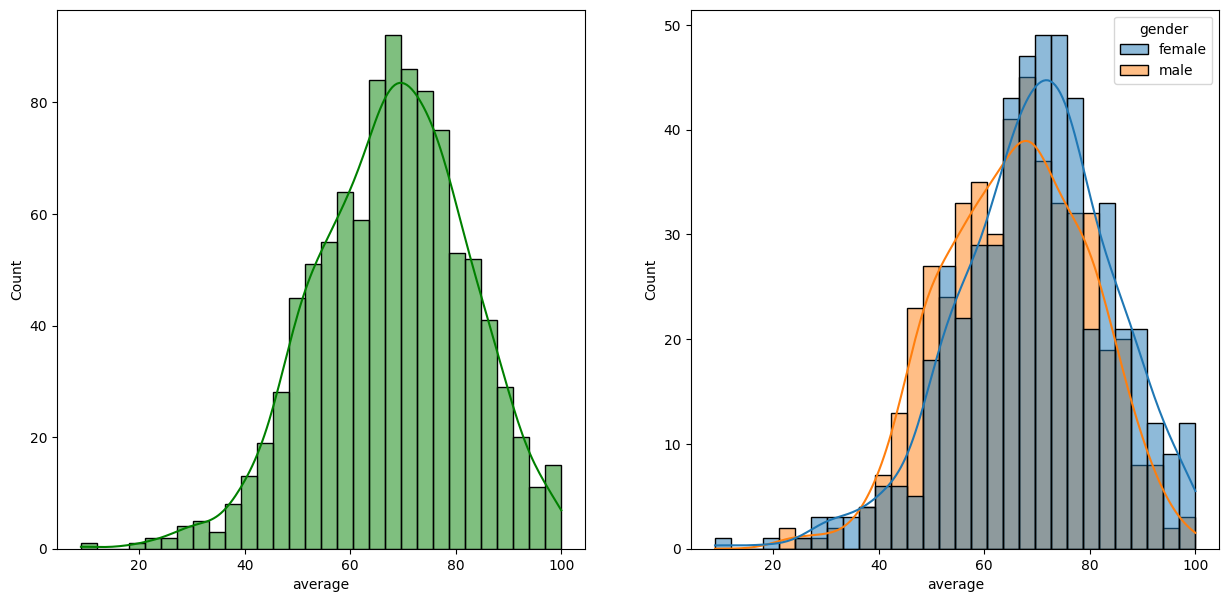

In [25]:
import seaborn as sns
fig, axs = plt.subplots(1, 2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()